# Urbancart Superstore Data Analysis Project

🏢 Business Problem

Despite steady sales growth, UrbanCart Superstore experiences inconsistent profitability across product categories, regions, and customer segments. The business needs to identify profit drivers and margin leakages to improve sustainable profitability.

This dataset contains cleaned retail sales transaction data for UrbanCart Superstore. Each row represents an individual order line item and includes details related to products, customer segments, geographic regions, sales, profit, discounts, and shipping modes.

Library import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Data load

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Python data analytics project/superstore/UrbanCart Superstore Clean Data.xlsx")

In [ ]:
df = data.copy(deep=True)

### 1. Data Understanding & Cleaning

In [ ]:
pd.set_option('display.max_columns', None)

Data view

In [ ]:
# Fist 5 rows of dataframe

df.head()

,Row ID,Order ID,Order Date,Ship Date,Delivery Days,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Months,Years
0,1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,November,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,November,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,June,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,October,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,October,2015


In [ ]:
# Last 5 rows of dataframe

df.tail()

,Row ID,Order ID,Order Date,Ship Date,Delivery Days,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Months,Years
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,2,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028,0.1625,January,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,5,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,0.1700,February,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,5,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,0.0750,February,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,5,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,0.4500,February,2017
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,5,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480,0.3000,May,2017


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Delivery Days',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Profit Margin', 'Months', 'Years'],
      dtype='object')

In [ ]:
# rows and columns in dataframe

df.shape

(9994, 25)

In [ ]:
# Check for missing values.

df.isnull().sum()

In [ ]:
df.info()

In [ ]:
# check for duplicated record

df.duplicated().sum()

np.int64(0)

In [ ]:
# check for column datatype

df.dtypes

In [ ]:
# Quick summary

df.describe()

New column created

In [ ]:
df["Revenue"] = df['Sales'] * df['Quantity']

In [ ]:
df["Net_Revenue"] = df['Revenue']*(1-df['Discount'])

In [ ]:
df["Year_Month"] = df['Order Date'].dt.to_period("M")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Delivery Days,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Months,Years,Revenue,Net_Revenue,Year_Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,November,2016,523.9200,523.920000,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,November,2016,2195.8200,2195.820000,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,June,2016,29.2400,29.240000,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,October,2015,4787.8875,2633.338125,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,October,2015,44.7360,35.788800,2015-10


###  2. Customer Analysis

In [ ]:
# 1. How many unique customers are there?

unique_customers = df['Customer ID'].nunique()
print(f"Total unique customers: {unique_customers}")

Total unique customers: 793


In [ ]:
# 2. Who are the top 10 customers by total revenue?

top_customers_by_revenue = df.groupby("Customer Name")["Net_Revenue"].sum().sort_values(ascending=False).reset_index()
top_customers_by_revenue.head(10)

,Customer Name,Net_Revenue
0,Adrian Barton,141627.4007
1,Tamara Chand,92482.7484
2,Sean Miller,76095.8380
3,Bill Shonely,70965.3589
4,Ken Lonsdale,69261.1537
5,Daniel Raglin,63842.2800
6,Maria Etezadi,62866.9704
7,Greg Tran,61821.8446
8,Sanjit Chand,61481.9788
9,Raymond Buch,60880.5209


In [ ]:
# 3. Who are the top 10 customers by profit?

top_customers_by_profit = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).reset_index()
top_customers_by_profit.head(10)

,Customer Name,Profit
0,Tamara Chand,8981.3239
1,Raymond Buch,6976.0959
2,Sanjit Chand,5757.4119
3,Hunter Lopez,5622.4292
4,Adrian Barton,5444.8055
5,Tom Ashbrook,4703.7883
6,Christopher Martinez,3899.8904
7,Keith Dawkins,3038.6254
8,Andy Reiter,2884.6208
9,Daniel Raglin,2869.0760


In [ ]:
# 4. Calculate average order value per customer.

average_order_value = df.groupby("Customer ID").agg(
    total_rev = ("Net_Revenue","sum"),
    total_orders = ("Customer ID", "nunique")).reset_index()

average_order_value["Avg order value"] = average_order_value["total_rev"] / average_order_value["total_orders"]
average_order_value

,Customer ID,total_rev,total_orders,Avg order value
0,AA-10315,13127.81920,1,13127.81920
1,AA-10375,2583.99800,1,2583.99800
2,AA-10480,5484.60480,1,5484.60480
3,AA-10645,20435.19565,1,20435.19565
4,AB-10015,1969.68800,1,1969.68800
...,...,...,...,...
788,XP-21865,7938.71160,1,7938.71160
789,YC-21895,26323.57080,1,26323.57080
790,YS-21880,40920.86560,1,40920.86560
791,ZC-21910,33364.85990,1,33364.85990


### 3. Overall Business Performance

In [ ]:
# 1. What is the total revenue, total profit, and total units sold?

total_revenue = df['Net_Revenue'].sum().round(2)
total_profit = df['Profit'].sum().round(2)
total_units = df['Quantity'].sum()

print(f"""Total Revenue: {total_revenue}\n
Total Profit: {total_profit}\n
Total Units: {total_units}""")


Total Revenue: 9894183.94

Total Profit: 286397.02

Total Units: 37873


In [ ]:
# 2. What is the overall profit margin (%)?

profit_margin = (total_profit/total_revenue) *100
print(profit_margin)

2.894599713698066


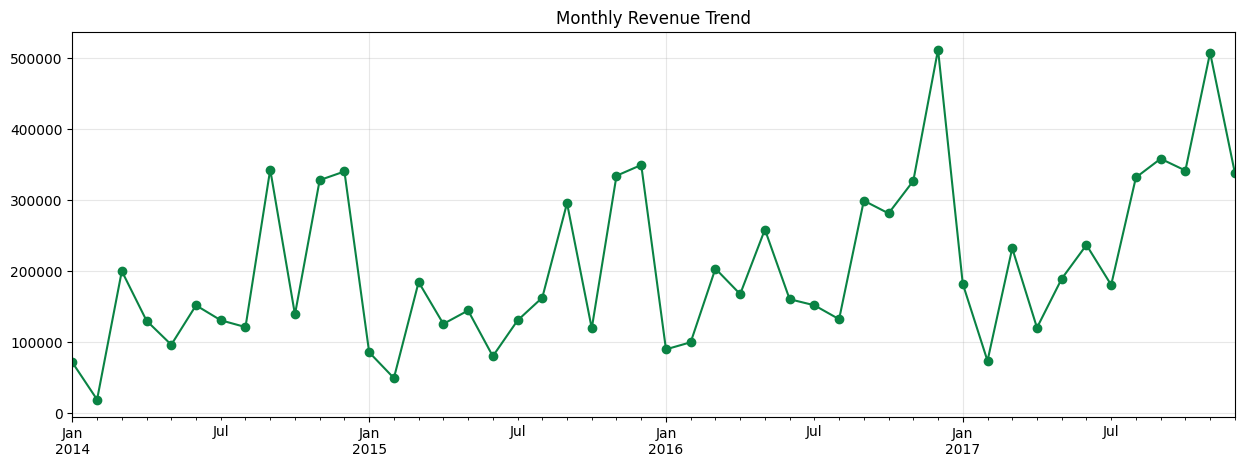

In [ ]:
# 3. How does revenue and profit trend over time (monthly / yearly)?

# Monthly Revenue Trend

monthly_revenue = df.groupby("Year_Month")["Net_Revenue"].sum()

monthly_revenue.plot(kind="line", figsize=(15,5), marker= "o", color="#0a8344")
plt.title("Monthly Revenue Trend")
plt.xlabel("")
plt.grid(True, alpha=0.3)
plt.show()

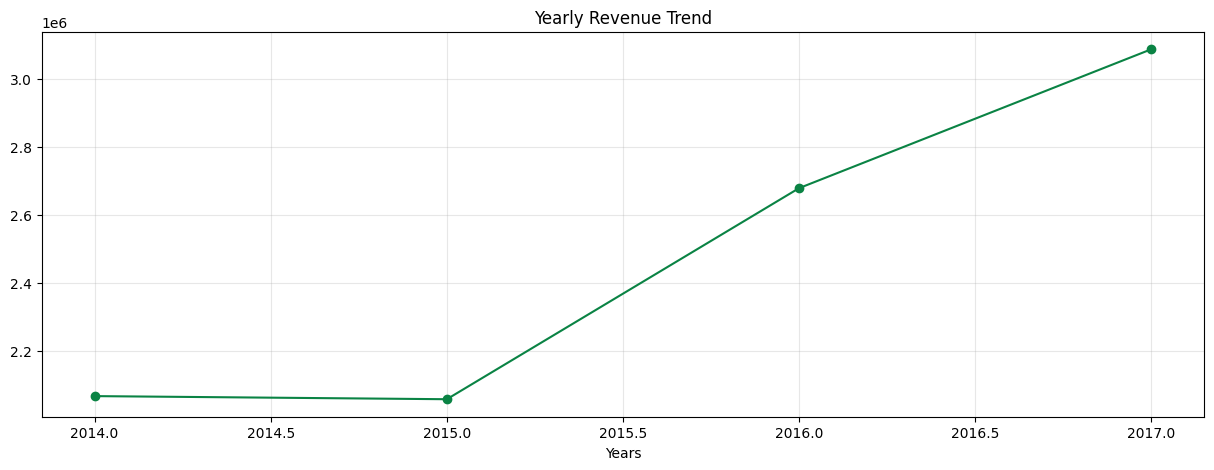

In [ ]:
# Yearly Revenue Trend

yearly_revenue = df.groupby("Years")["Net_Revenue"].sum().round()

yearly_revenue.plot(kind="line", figsize=(15,5), marker= "o", color="#0a8344")
plt.title("Yearly Revenue Trend")
plt.grid(True, alpha=0.3)
plt.show()


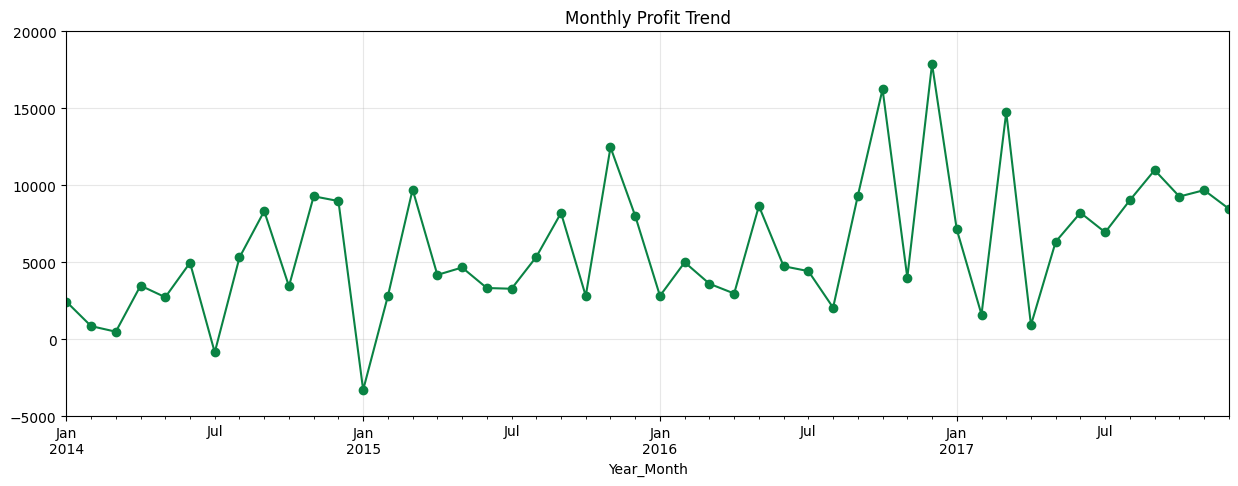

In [ ]:
# Monthly Profit Trend

monthly_profit = df.groupby("Year_Month")["Profit"].sum()


monthly_profit.plot(kind="line", figsize=(15,5), marker="o", color="#0a8344")
plt.ylim(-5000, 20000)
plt.grid(True, alpha=0.3)
plt.title("Monthly Profit Trend")
plt.show()

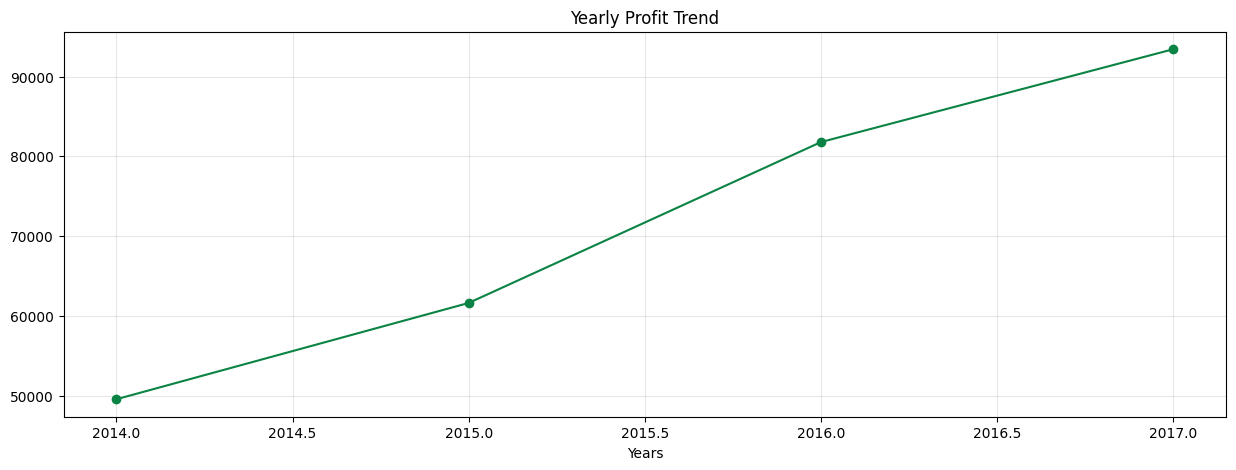

In [ ]:
# Yearly Profit Trend

yearly_profit = df.groupby("Years")["Profit"].sum()

yearly_profit.plot(kind="line", figsize=(15,5), marker="o", color="#0a8344")
# plt.ylim(-5000, 20000)
plt.grid(True, alpha=0.3)
plt.title("Yearly Profit Trend")
plt.show()

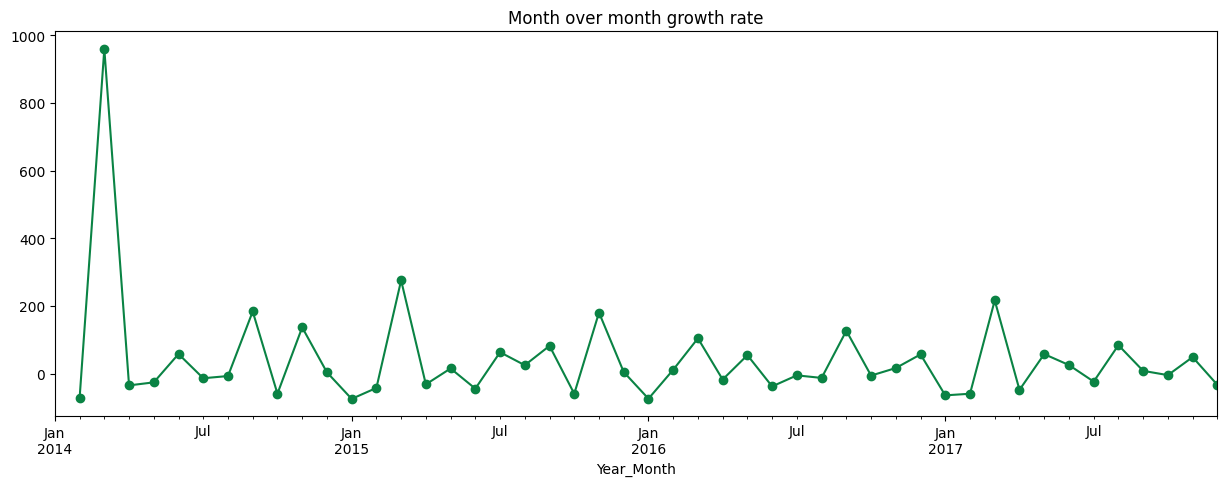

In [ ]:
# 4. Calculate month-over-month growth rate.

monthly_growth_rate = monthly_revenue.pct_change()*100

monthly_growth_rate.plot(kind="line", figsize=(15, 5), color="#0a8344", marker="o")
plt.title("Month over month growth rate")
plt.show()

In [ ]:
# 5. Which month generated the highest revenue?

highest_revenue = df.groupby("Year_Month")["Net_Revenue"].sum().sort_values(ascending=False).reset_index()
highest_revenue.head(1)

,Year_Month,Net_Revenue
0,2016-12,511540.4563


In [ ]:
# 6. Which month generated the highest profit?

highest_profit = df.groupby("Year_Month")["Profit"].sum().sort_values(ascending=False).reset_index()
highest_profit.head(1)

,Year_Month,Profit
0,2016-12,17885.3093


###  4. Regional & Market Analysis

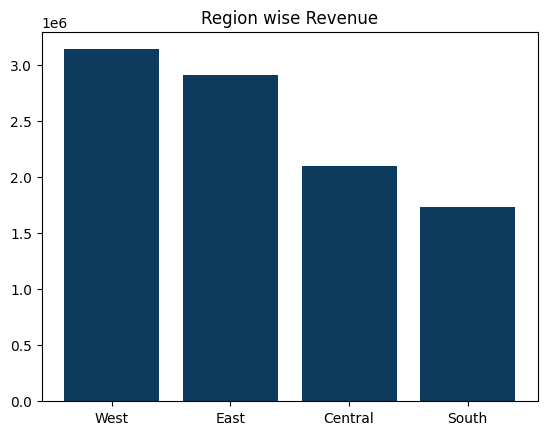

In [ ]:
# 1. Which region generates the highest revenue?

region_wise_rev = df.groupby("Region")["Net_Revenue"].sum().round(0).sort_values(ascending=False).reset_index()

plt.bar(region_wise_rev['Region'], region_wise_rev['Net_Revenue'], color="#0c3b5d")
plt.title("Region wise Revenue")
plt.show()

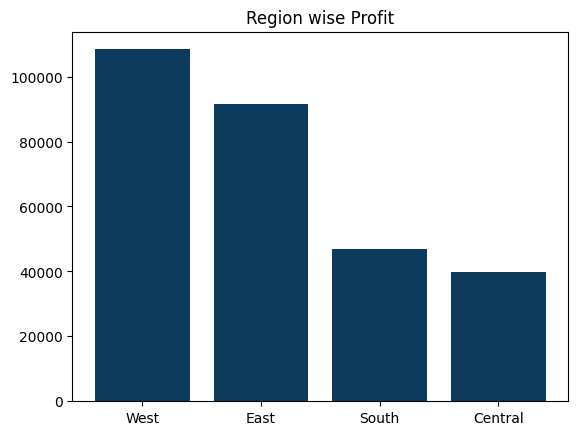

In [ ]:
# 2. Which region is the most profitable?

profitable_region = df.groupby("Region")["Profit"].sum().sort_values(ascending= False).reset_index()

plt.bar(profitable_region['Region'], profitable_region['Profit'], color="#0c3b5d")
plt.title("Region wise Profit")
plt.show()

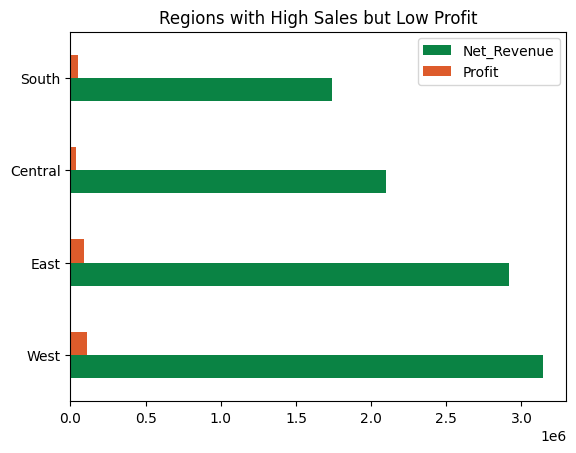

In [ ]:
# 3. Are there regions with high sales but low profit?

high_sale_low_profit = df.groupby("Region")[["Net_Revenue", "Profit"]].sum().round(0).sort_values(by="Net_Revenue", ascending=False)

high_sale_low_profit.plot(kind="barh", color=["#0a8344", "#dd5b2b"])
plt.title("Regions with High Sales but Low Profit")
plt.ylabel("")
plt.show()

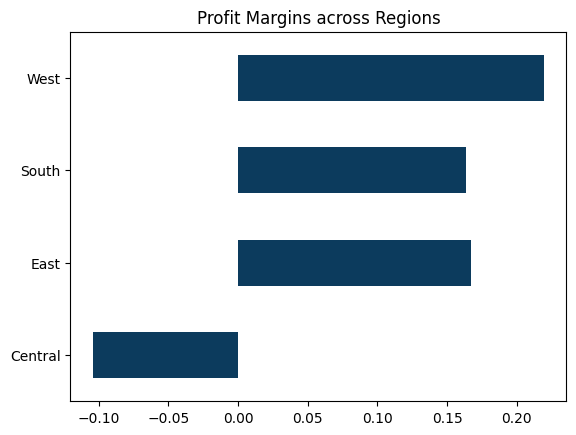

In [ ]:
# 4. Compare profit margins across regions.

profit_margin_region = df.groupby("Region")["Profit Margin"].mean()

profit_margin_region.plot(kind="barh", color="#0c3b5d")
plt.title("Profit Margins across Regions")
plt.ylabel("")
plt.show()

###  5. Product & Category Analysis

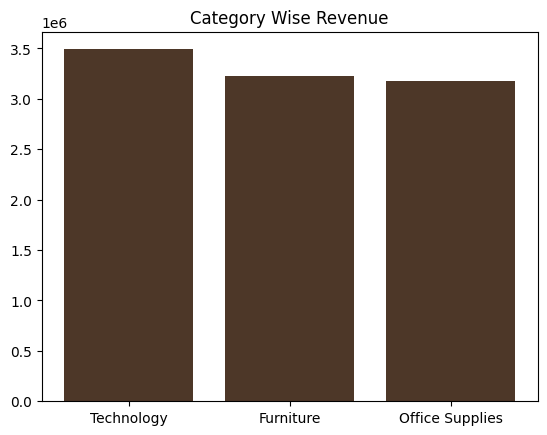

In [ ]:
# 1. Which product category generates the highest revenue?

category_revenue = df.groupby("Category")["Net_Revenue"].sum().round(0).sort_values(ascending=False).reset_index()
category_revenue

plt.bar(category_revenue["Category"], category_revenue["Net_Revenue"], color="#4d3728")
plt.title("Category Wise Revenue")
plt.show()

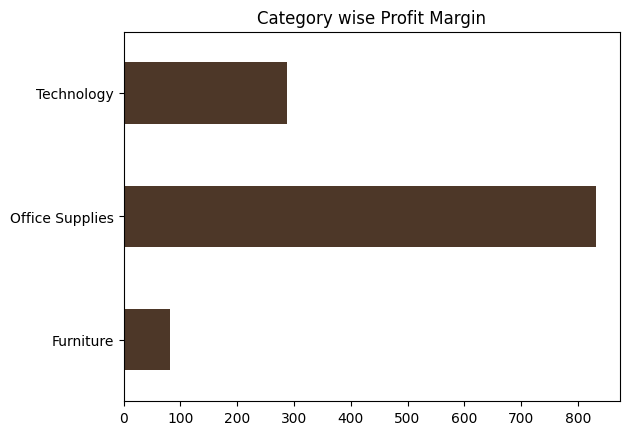

In [ ]:
# 2. Which category has the highest profit margin?

category_wise_profit_margin = df.groupby("Category")["Profit Margin"].sum()

category_wise_profit_margin.plot(kind="barh", color="#4d3728")
plt.title("Category wise Profit Margin")
plt.ylabel("")
plt.show()

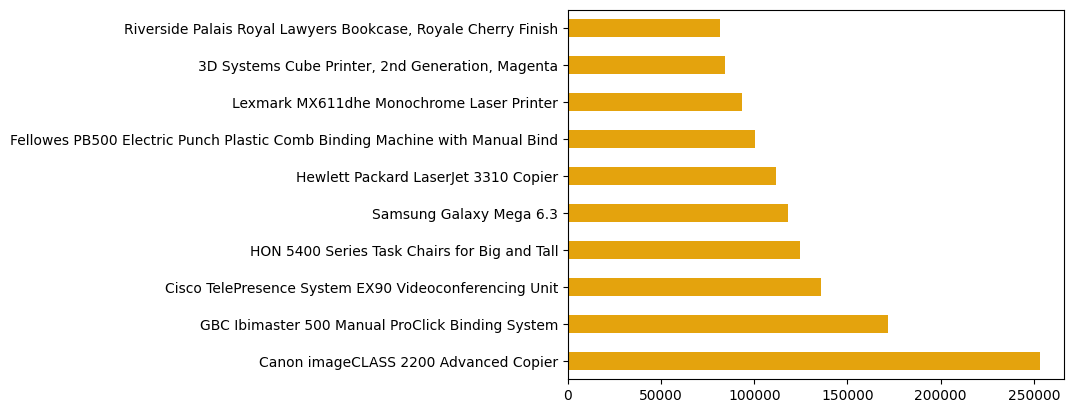

In [ ]:
# 3. Identify the top 10 products by revenue.

top_10_products = df.groupby("Product Name")["Revenue"].sum().sort_values(ascending=False)

top_10_products.head(10).plot(kind="barh", color="#e4a30d")
plt.ylabel("")
plt.show()

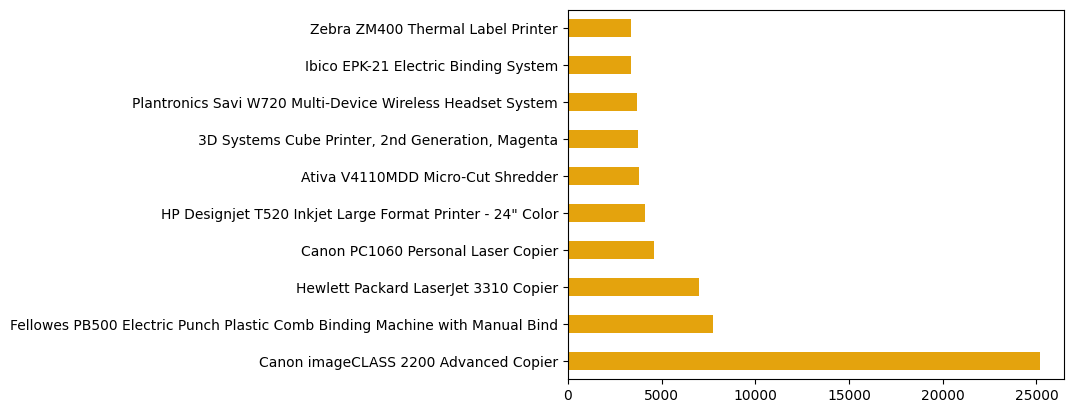

In [ ]:
# 4. Identify the top 10 products by profit.

top_products_profit = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False)

top_products_profit.head(10).plot(kind="barh", color="#e4a30d")
plt.ylabel("")
plt.show()

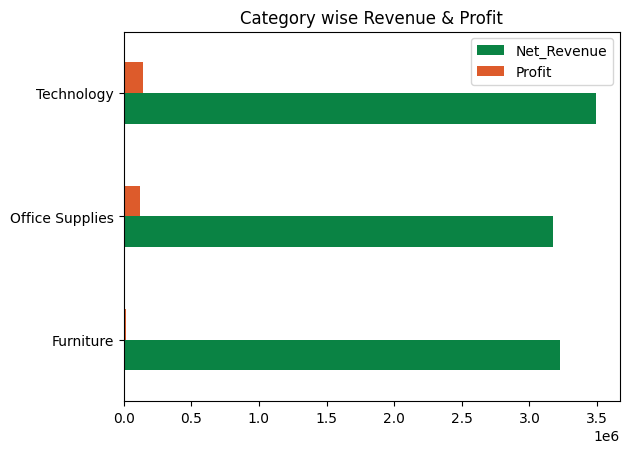

In [ ]:
# 5. Plot category-wise revenue and profit.

category_summary = df.groupby("Category")[["Net_Revenue", "Profit"]].sum().round(0)

category_summary.plot(kind="barh", color=["#0a8344", "#dd5b2b"])
plt.title("Category wise Revenue & Profit")
plt.ylabel("")
plt.show()

### 6. Key Insights from UrbanCart Superstore Data Analysis


**1. Overall Business Performance:**
*   **Total Revenue:** The total revenue generated is `$9,894,183.94`.
*   **Total Profit:** The total profit recorded is `$286,397.02`.
*   **Total Units Sold:** A total of `37,873` units have been sold.
*   **Overall Profit Margin:** The overall profit margin for UrbanCart Superstore is approximately `2.89%`.
*   **Trends Over Time:** Both revenue and profit show an increasing trend year-over-year, despite some monthly fluctuations.
*   **Highest Performing Month:** December 2016 generated both the highest revenue (`$511,540.46`) and the highest profit (`$17,885.31`).

**2. Regional & Market Analysis:**
*   **Highest Revenue Region:** The West region generates the highest revenue (`$3,142,034`).
*   **Most Profitable Region:** The West region is also the most profitable (`$108,418.45`).
*   **Regions with High Sales and Low Profit/Negative Profit Margin:**
    *   The Central region has a negative profit margin of approximately `-10.4%`, indicating significant losses despite considerable revenue (`$2,099,688`).
    *   The South region has lower profit (`$46,749.43`) compared to its revenue (`$1,736,787`), although its profit margin is positive (`16.35%`).
    *   (West: Profit Margin ~21.95%; East: Profit Margin ~16.72%; South: Profit Margin ~16.35%; Central: Profit Margin ~-10.41%)

**3. Product & Category Analysis:**
*   **Highest Revenue Category:** (`Technology`) is the product category that generates the highest revenue (`$3,491,750`).
*   **Highest Profit Margin Category:** Technology has the highest profit margin (`4.16%`), followed closely by Office Supplies (`3.86%`), and then Furniture (`0.57%`).
*   **Top Products by Revenue:** The `Canon imageCLASS 2200 Advanced Copier` and `GBC Ibimaster 500 Manual ProClick Binding System` are among the top products by revenue.
*   **Top Products by Profit:** The `Canon imageCLASS 2200 Advanced Copier` also leads in terms of profit, followed by `Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind`.

### Recommendations for UrbanCart Superstore Stakeholders

Based on the data analysis, the following recommendations are put forth to enhance profitability and operational efficiency:

**1. Customer-Centric Strategies:**
*   **Loyalty Programs:** Implement a tiered loyalty program for top customers, offering exclusive discounts, early access to sales, or personalized product recommendations to foster continued engagement and revenue.


**2. Optimizing Overall Business Performance:**
*   **Seasonal Analysis:** Deep dive into the factors that contributed to the exceptional performance in December 2016 (highest revenue and profit month) to identify repeatable strategies for peak seasons.
*   **Profit Margin Improvement:** Investigate strategies to improve the overall profit margin (currently at 2.89%), potentially through optimizing pricing strategies, negotiating better supplier deals, or reducing operational costs.
*   **Stabilize Monthly Fluctuations:** Analyze the causes of significant monthly revenue and profit fluctuations to implement measures that promote more consistent growth throughout the year.

**3. Regional Performance Enhancement:**
*   **Address Central Region Losses:** Conduct a thorough investigation into the Central region's negative profit margin. This should include reviewing discount strategies, shipping costs, product mix, and competitive landscape to implement immediate corrective actions. Consider reducing unprofitable products or adjusting pricing in this region.
*   **Capitalize on West Region Success:** Understand the best practices and success factors in the West region to potentially replicate them in other regions, especially the East and South, to boost their profitability.
*   **Regional Profitability Review:** Regularly review profit margins across all regions to identify and address any emerging areas of concern promptly.

**4. Product and Category Management:**
*   **Leverage High-Performing Categories:** Continue to invest in and promote 'Technology' and 'Office Supplies' categories, which show strong revenue and high-profit margins. Explore opportunities for expanding product lines within these categories.
*   **Re-evaluate Furniture Category:** The 'Furniture' category has a significantly lower profit margin (0.57%). Conduct a detailed cost-benefit analysis for furniture products. Consider strategies like optimizing inventory, re-negotiating supplier contracts, adjusting pricing, or re-evaluating the assortment to improve profitability.
